
##**TITLE: EEG-Based Emotion Classification Using Deep Neural Networks**

**KRISHNAVENI KATTA**


In [52]:
#Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image
import os
import cv2
import os
import h5py
import dlib

from keras.models import load_model
import sys
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,Dropout
from keras.layers import Dense, Activation, Flatten

from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


import xgboost as xgb

from keras import callbacks

In [53]:
#Mounting the colab drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
# Specify the path to your CSV file within your Google Drive

file_path ='/content/drive/MyDrive/Google_collab/1.Machine_Learning/2.Individual_Projects/2.Emotions_Project/emotions.csv'

# Load the dataset using pandas
data = pd.read_csv(file_path)

In [55]:
#LOADING THE DATASET
#filePath = "/content/emotions.csv"
#data = pd.read_csv(filePath)

print("Data shape: {}".format(data.shape))

with pd.option_context('expand_frame_repr', False):
    print(data.head())# Take a quick view few rows, at the data using the head method in Pandas

Data shape: (2132, 2549)
   # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  fft_744_b  fft_745_b  fft_746_b  fft_747_b  fft_748_b  fft_749_b     label
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411      -15.70        2.06        3.15  ...       23.5       20.3       20.3       23.5     -215.0     280.00    -162.00    -162.00     280.00  NEGATIVE
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8      -23.3      182.0       2.57     -31.60     -31.60       2.57   NEUTRAL
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360       90.20       89.90        2.03  ...      462.0     -233.0     -233.0      462.0     -267.0     281.00    -148.00    -148.00     281.00  POSITIVE
3       14.90      31.6    -143.0      19.8      24.3      -0.5

In [56]:
data

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,NEGATIVE


In [58]:
## generate descriptive statistics which is very helpful
data.describe()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
count,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,...,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,15.256914,27.012462,-104.975629,13.605898,24.150483,0.025378,0.052282,0.301655,0.036793,0.083567,...,-22.938971,104.946111,-51.973647,-51.973647,104.946111,-6.934144,95.104886,-49.061255,-49.061255,95.104886
std,15.284621,9.265141,206.271960,16.874676,14.187340,17.981796,8.509174,68.098894,17.010031,18.935378,...,298.034311,212.532721,112.160233,112.160233,212.532721,281.040552,203.194976,106.486317,106.486317,203.194976
min,-61.300000,-114.000000,-970.000000,-137.000000,-217.000000,-218.000000,-255.000000,-1360.000000,-203.000000,-553.000000,...,-1180.000000,-921.000000,-504.000000,-504.000000,-921.000000,-1160.000000,-1010.000000,-521.000000,-521.000000,-1010.000000
25%,6.577500,26.075000,-195.000000,4.857500,23.600000,-3.105000,-1.340000,-4.002500,-2.905000,-2.622500,...,-106.500000,-8.365000,-92.900000,-92.900000,-8.365000,-102.500000,-8.837500,-87.150000,-87.150000,-8.837500
50%,14.100000,30.000000,14.950000,15.400000,25.200000,-0.044600,0.132000,0.957500,-0.099750,0.146500,...,83.850000,12.150000,-21.800000,-21.800000,12.150000,89.700000,13.400000,-24.100000,-24.100000,13.400000
75%,27.700000,31.400000,29.600000,26.500000,26.800000,2.920000,1.540000,6.735000,2.535000,2.870000,...,154.000000,177.000000,12.025000,12.025000,177.000000,153.000000,149.250000,10.925000,10.925000,149.250000
max,304.000000,42.300000,661.000000,206.000000,213.000000,402.000000,257.000000,1150.000000,349.000000,444.000000,...,1070.000000,843.000000,1490.000000,1490.000000,843.000000,1180.000000,888.000000,1670.000000,1670.000000,888.000000


#**Exploratory data analysis**


In [60]:
data.shape

(2132, 2549)

In [61]:
data.info

<bound method DataFrame.info of       # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  \
0          4.620      30.3    -356.0     15.60      26.3       1.070   
1         28.800      33.1      32.0     25.80      22.8       6.550   
2          8.900      29.4    -416.0     16.70      23.7      79.900   
3         14.900      31.6    -143.0     19.80      24.3      -0.584   
4         28.300      31.3      45.2     27.30      24.5      34.800   
...          ...       ...       ...       ...       ...         ...   
2127      32.400      32.2      32.2     30.80      23.4       1.640   
2128      16.300      31.3    -284.0     14.30      23.9       4.200   
2129      -0.547      28.3    -259.0     15.80      26.7       9.080   
2130      16.800      19.9    -288.0      8.34      26.0       2.460   
2131      27.000      32.0      31.8     25.00      28.9       4.990   

      mean_d_1_a  mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  \
0          0.411     -15.700       2.060        3.15  ...      23.50   
1          1.680       2.880       3.830       -4.82  ...     -23.30   
2          3.360      90.200      89.900        2.03  ...     462.00   
3         -0.284       8.820       2.300       -1.97  ...     299.00   
4         -5.790       3.060      41.400        5.52  ...      12.00   
...          ...         ...         ...         ...  ...        ...   
2127      -2.030       0.647      -0.121       -1.10  ...     -21.70   
2128       1.090       4.460       4.720        6.63  ...     594.00   
2129       6.900      12.700       2.030        4.64  ...     370.00   
2130       1.580     -16.000       1.690        4.74  ...     124.00   
2131       1.950       6.210       3.490       -3.51  ...       1.95   

      fft_742_b  fft_743_b  fft_744_b  fft_745_b  fft_746_b  fft_747_b  \
0        20.300     20.300      23.50     -215.0     280.00    -162.00   
1       -21.800    -21.800     -23.30      182.0       2.57     -31.60   
2      -233.000   -233.000     462.00     -267.0     281.00    -148.00   
3      -243.000   -243.000     299.00      132.0     -12.40       9.53   
4        38.100     38.100      12.00      119.0     -17.60      23.90   
...         ...        ...        ...        ...        ...        ...   
2127      0.218      0.218     -21.70       95.2     -19.90      47.20   
2128   -324.000   -324.000     594.00      -35.5     142.00     -59.80   
2129   -160.000   -160.000     370.00      408.0    -169.00     -10.50   
2130    -27.600    -27.600     124.00     -656.0     552.00    -271.00   
2131      1.810      1.810       1.95      110.0      -6.71      22.80   

      fft_748_b  fft_749_b     label  
0       -162.00     280.00  NEGATIVE  
1        -31.60       2.57   NEUTRAL  
2       -148.00     281.00  POSITIVE  
3          9.53     -12.40  POSITIVE  
4         23.90     -17.60   NEUTRAL  
...         ...        ...       ...  
2127      47.20     -19.90   NEUTRAL  
2128     -59.80     142.00  POSITIVE  
2129     -10.50    -169.00  NEGATIVE  
2130    -271.00     552.00  NEGATIVE  
2131      22.80      -6.71   NEUTRAL  

[2132 rows x 2549 columns]>

In [62]:
# Checking the datatypes of the columns

data.dtypes

# mean_0_a    float64
mean_1_a      float64
mean_2_a      float64
mean_3_a      float64
mean_4_a      float64
               ...   
fft_746_b     float64
fft_747_b     float64
fft_748_b     float64
fft_749_b     float64
label          object
Length: 2549, dtype: object

In [63]:
data.label.unique

<bound method Series.unique of 0       NEGATIVE
1        NEUTRAL
2       POSITIVE
3       POSITIVE
4        NEUTRAL
          ...   
2127     NEUTRAL
2128    POSITIVE
2129    NEGATIVE
2130    NEGATIVE
2131     NEUTRAL
Name: label, Length: 2132, dtype: object>

In [64]:
data['label'].value_counts()

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64

It is a balanced dataset.The column named label consists of NEUTRAL, POSITIVE, and NEGATIVE.

<Axes: >

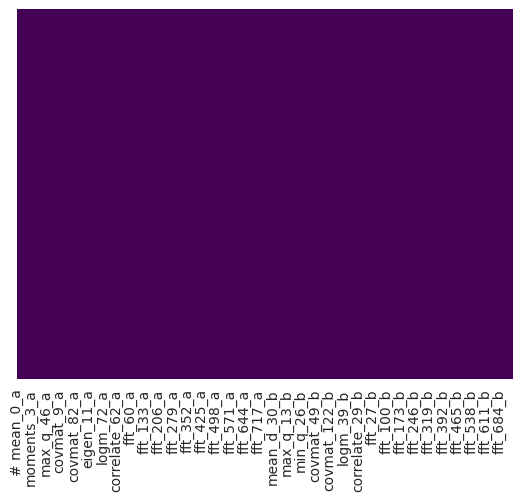

In [65]:
# first let us try to visualize the missing columns in each and every feature
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

It is visible that there are no missing values

In [66]:
#representing each column in the dataset
data.columns

Index(['# mean_0_a', 'mean_1_a', 'mean_2_a', 'mean_3_a', 'mean_4_a',
       'mean_d_0_a', 'mean_d_1_a', 'mean_d_2_a', 'mean_d_3_a', 'mean_d_4_a',
       ...
       'fft_741_b', 'fft_742_b', 'fft_743_b', 'fft_744_b', 'fft_745_b',
       'fft_746_b', 'fft_747_b', 'fft_748_b', 'fft_749_b', 'label'],
      dtype='object', length=2549)

Viewing the time series data for row 1, column fft 0 a to fft 749 a
We will examine a sample of the data to evaluate whether it is a time series dataset.

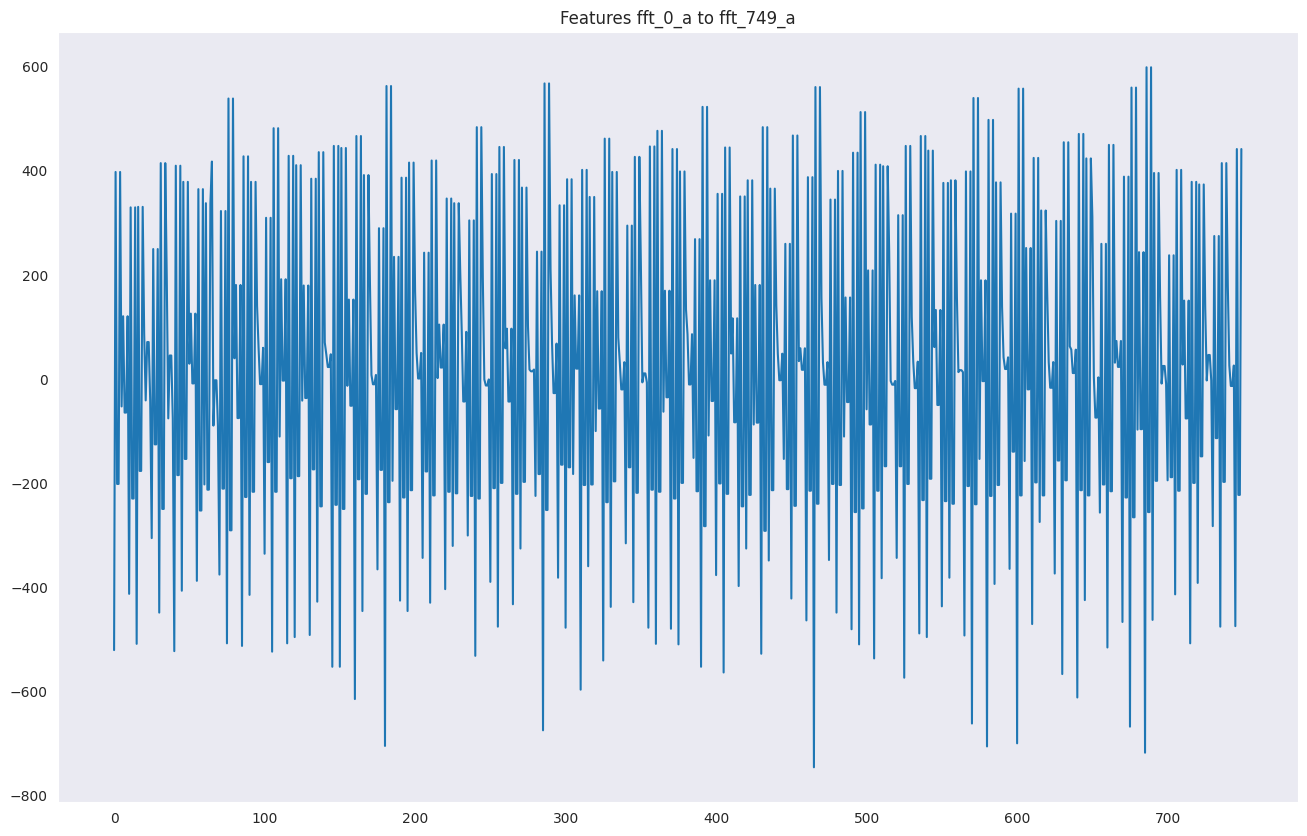

In [67]:
sample = data.loc[0, 'fft_0_a':'fft_749_a']

plt.figure(figsize=(16, 10)) #figure size
plt.plot(range(len(sample)), sample) # x = length of sample, y = sample
plt.title("Features fft_0_a to fft_749_a")
plt.show()

In [68]:
#Checking for missing values
data.isnull().sum()

# mean_0_a    0
mean_1_a      0
mean_2_a      0
mean_3_a      0
mean_4_a      0
             ..
fft_746_b     0
fft_747_b     0
fft_748_b     0
fft_749_b     0
label         0
Length: 2549, dtype: int64

In [69]:
# defining the input and output columns to separate the dataset in the later cells.

input_columns = list(data.columns[:-1])
output_columns = ['NEGATIVE', 'NEUTRAL', 'POSITIVE']    # column names to be used after one-hot encoding

print("Number of input columns: ", len(input_columns))
print("Number of output columns: ", len(output_columns))

Number of input columns:  2548
Number of output columns:  3


<Axes: xlabel='label', ylabel='count'>

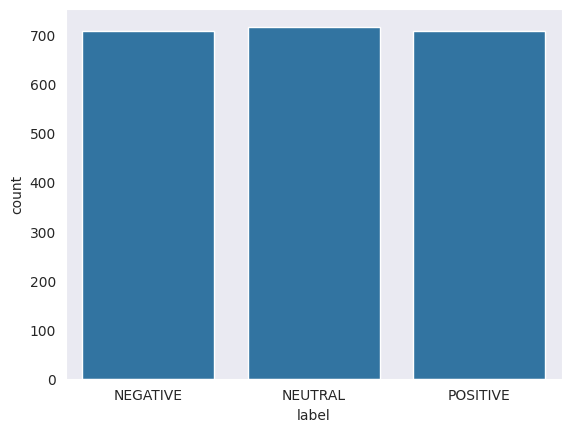

In [70]:
sns.countplot(x= 'label', data=data)

In [71]:
encode = ({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2} )
#new dataset with replaced values
data_encoded = data.replace(encode)

print(data_encoded.head())
print(data_encoded['label'].value_counts())


   # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_745_b  fft_746_b  ff

In [72]:
data_encoded['label'].unique()

array([2, 0, 1])

In [73]:
data_encoded.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,2
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,0
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,1
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,1
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,0


In [74]:
data_encoded['label'].unique()

array([2, 0, 1])

In [75]:
data_encoded['label'].value_counts()

0    716
2    708
1    708
Name: label, dtype: int64

<Axes: >

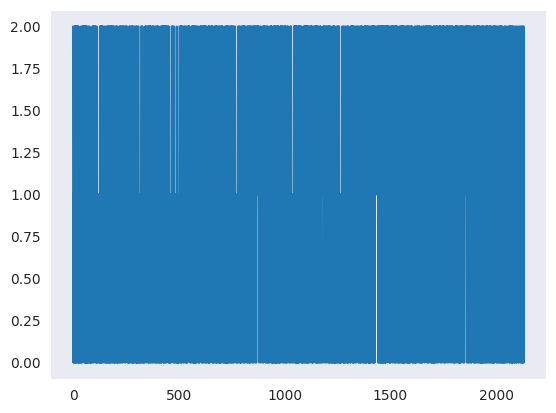

In [76]:
data_encoded['label'].plot()

#**Preprocessing the dataset values**

The CSV file's emotion property is divided into three categories and is one-hot encoded to provide the model's output.

Labelling the label provided with an integer

NEGATIVE will be labelled as 0, NEUTRAL as 1, POSITIVE as 2

In [77]:
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}
data['label'] = data['label'].replace(label_mapping)

<Axes: xlabel='label', ylabel='count'>

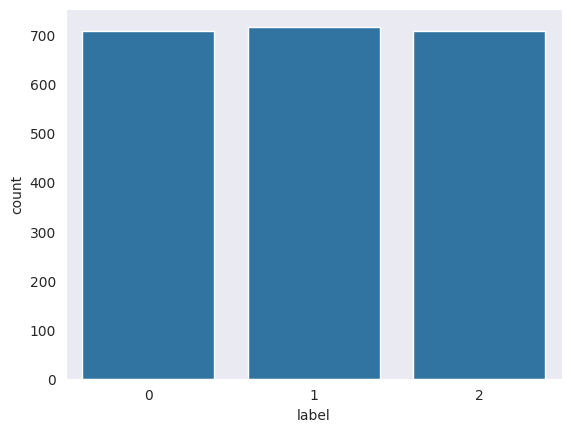

In [78]:
sns.countplot(x= 'label', data=data)

In [79]:
X=data_encoded.drop(["label"]  ,axis=1)
X.shape

(2132, 2548)

In [80]:
y = data_encoded.loc[:,'label'].values
y.shape

(2132,)

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

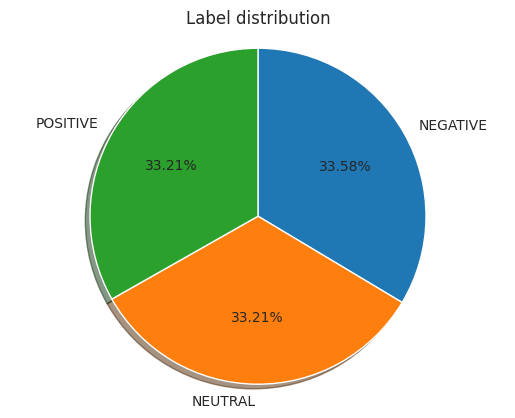

Samples associated with NEGATIVE : 716
Samples associated with NEURAL: 708
Samples associated with POSITIVE: 708


In [82]:
_, label_counts = np.unique(y, return_counts=True)
label_names = ['NEGATIVE', 'NEUTRAL', 'POSITIVE']
fig, axes = plt.subplots()
axes.pie(label_counts, labels=label_names, autopct='%1.2f%%',
        shadow=True, startangle=90, counterclock=False)
axes.axis('equal')
axes.set_title('Label distribution')
plt.show()

print("Samples associated with NEGATIVE : {}".format(label_counts[0]))
print("Samples associated with NEURAL: {}".format(label_counts[1]))
print("Samples associated with POSITIVE: {}".format(label_counts[2]))

##Training the data

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=111, test_size=0.3)
X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, random_state=111, test_size=0.3)


In [125]:
X_train = np.array(X_train).reshape((X_train.shape[0],X_train.shape[1],1))
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1],1))

y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)
y_val = pd.get_dummies(y_val)

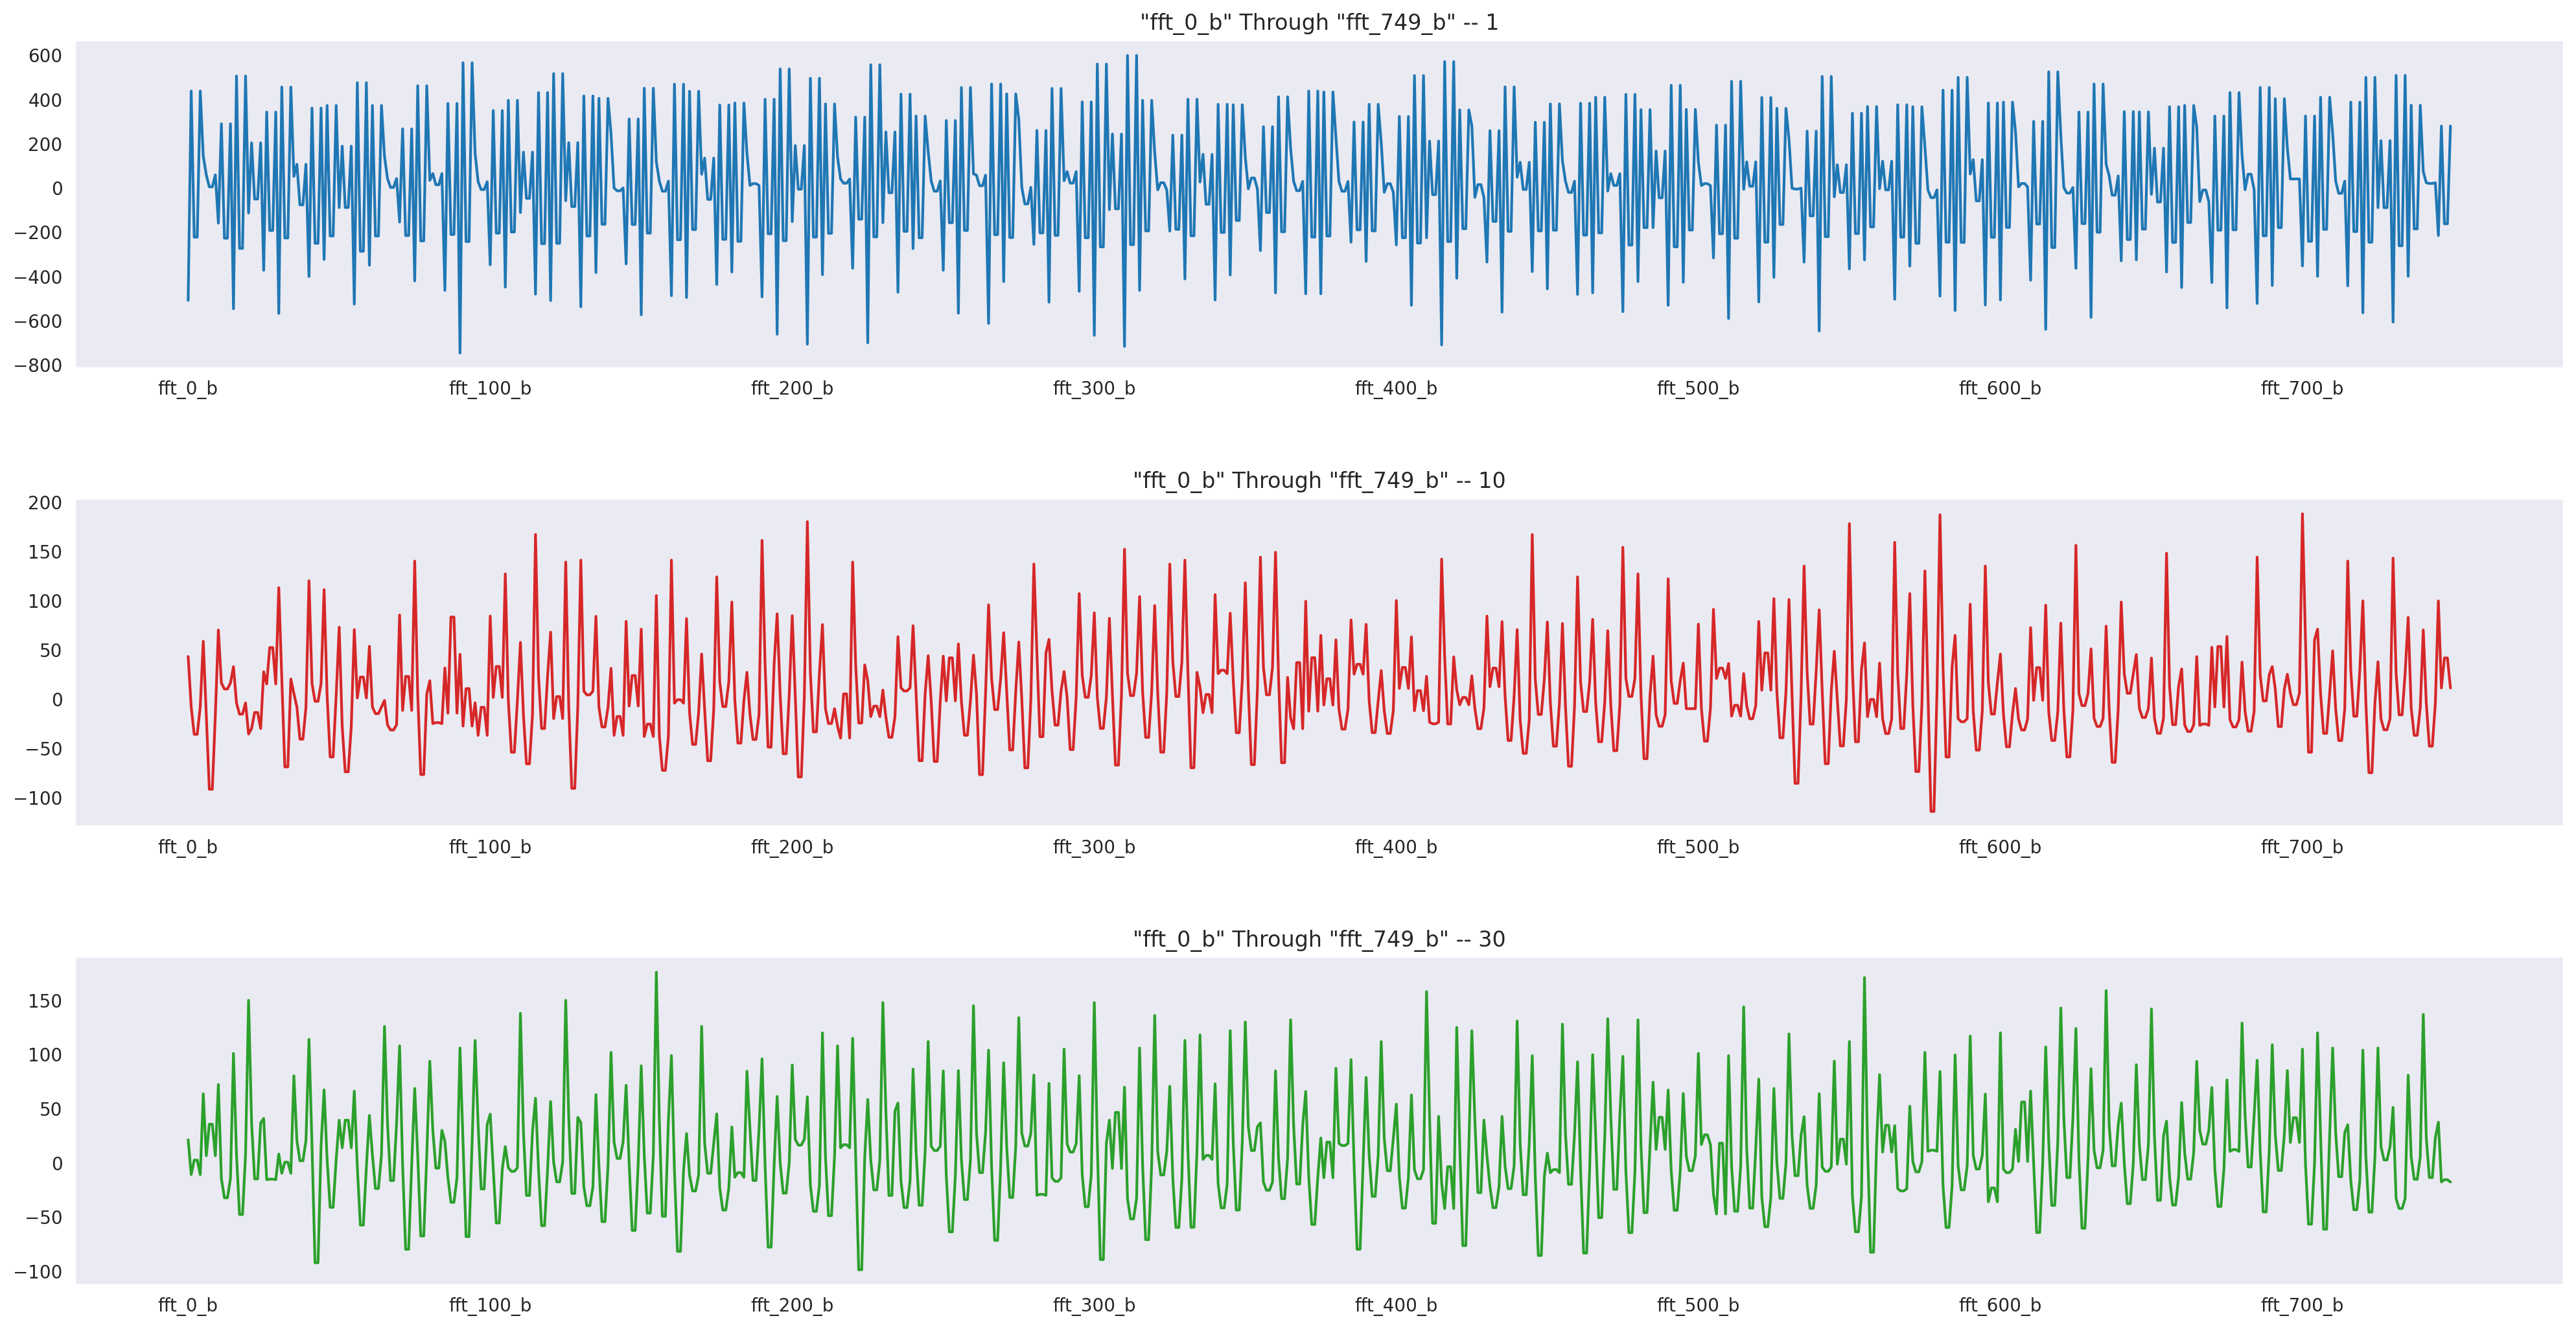

In [85]:
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=200, figsize=(24, 12))

data.loc[0, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" Through \"fft_749_b\" -- 1', color='tab:blue', ax=axes[0])
data.loc[10, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" Through \"fft_749_b\" -- 10', color='tab:red', ax=axes[1])
data.loc[30, 'fft_0_b':'fft_749_b'].plot(title='\"fft_0_b\" Through \"fft_749_b\" -- 30', color='tab:green', ax=axes[2])

plt.subplots_adjust(left=0.1, bottom=0.1,
                    right=0.9, top=0.9,
                    wspace=0.4, hspace=0.4)

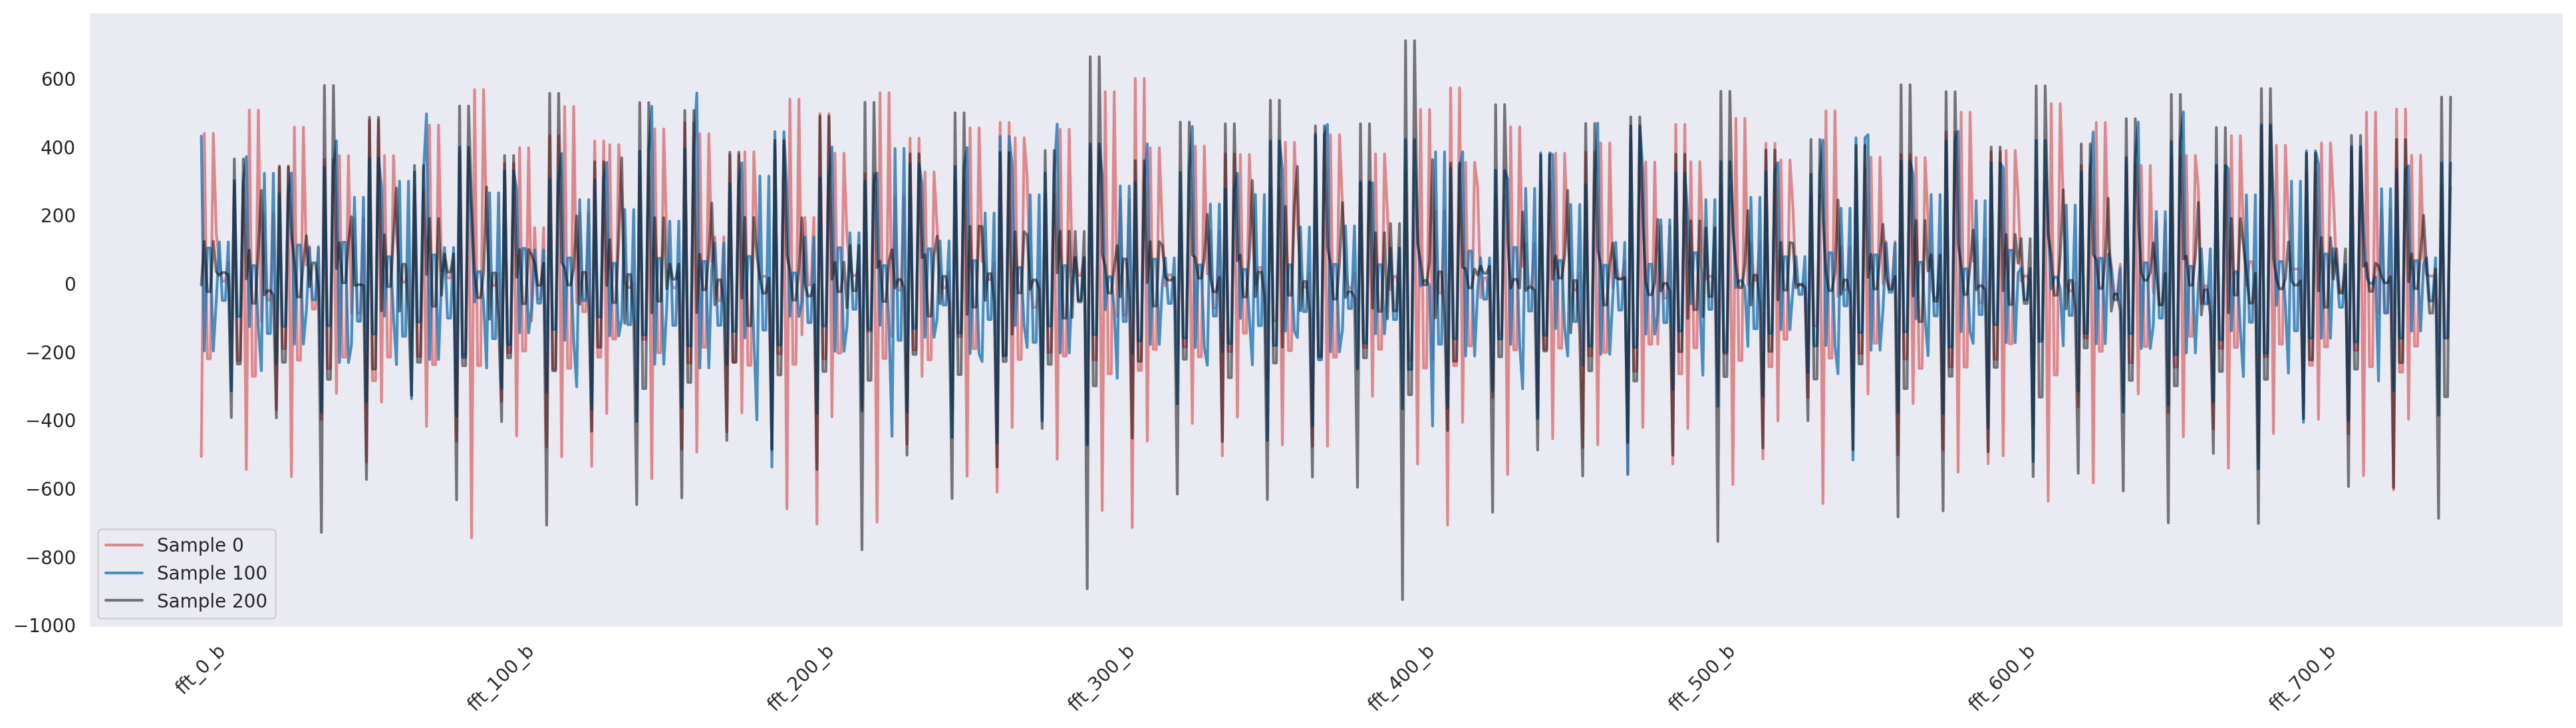

In [86]:
plt.figure(dpi=200, figsize=(24, 6))


plt.plot(data.loc[0, 'fft_0_b':'fft_749_b'], label='Sample 0', color='tab:red', alpha=.5)
plt.plot(data.loc[100, 'fft_0_b':'fft_749_b'], label='Sample 100', color='tab:blue', alpha=.8)
plt.plot(data.loc[200, 'fft_0_b':'fft_749_b'], label='Sample 200', color='black', alpha=.5)


plt.xticks(np.arange(0, len(data.loc[0, 'fft_0_b':'fft_749_b']) + 1, 100), rotation=45)
plt.legend(loc='best')

plt.show()

In [87]:
pip install pandas-profiling

In [88]:
%matplotlib inline

import warnings
import itertools
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas_profiling as pp

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense, Flatten, LSTM, Input, Dropout, BatchNormalization, GRU
from tensorflow.keras import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

sns.set_style('dark')

warnings.filterwarnings('ignore')

##Model Evaluation

In [89]:
from tensorflow.keras import Model
from tensorflow.keras.models import load_model

In [90]:
from tensorflow.keras.layers import Dense, Flatten, LSTM, Input, Dropout, BatchNormalization, GRU
i_lstm = Input(shape=(X_train.shape[1], 1))

x_lstm = LSTM(256, return_sequences=True)(i_lstm)
x_lstm = Flatten()(x_lstm)
y_lstm = Dense(3, activation='softmax')(x_lstm)

model_lstm = Model(i_lstm, y_lstm)

model_lstm.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 2548, 1)]         0         
                                                                 
 lstm_1 (LSTM)               (None, 2548, 256)         264192    
                                                                 
 flatten_3 (Flatten)         (None, 652288)            0         
                                                                 
 dense_9 (Dense)             (None, 3)                 1956867   
                                                                 
Total params: 2221059 (8.47 MB)
Trainable params: 2221059 (8.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [91]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
adam = Adam(learning_rate=0.001)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
mc = ModelCheckpoint('./best_lstm_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
lr_schedule = LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))

model_lstm.compile(optimizer=adam,
                  loss=['categorical_crossentropy'],
                  metrics=['accuracy'])

lstm_h = model_lstm.fit(X_train, y_train,
                   batch_size=32,
                   validation_data=(X_val, y_val),
                   epochs=50,
                   callbacks=[es, mc, lr_schedule])

Epoch 1/50
33/33 [==============================] - ETA: 0s - loss: 0.4116 - accuracy: 0.8649
Epoch 1: val_accuracy improved from -inf to 0.87277, saving model to ./best_lstm_model.h5
33/33 [==============================] - 7s 148ms/step - loss: 0.4116 - accuracy: 0.8649 - val_loss: 0.2655 - val_accuracy: 0.8728 - lr: 0.0010
Epoch 2/50
33/33 [==============================] - ETA: 0s - loss: 0.2184 - accuracy: 0.9205
Epoch 2: val_accuracy improved from 0.87277 to 0.90848, saving model to ./best_lstm_model.h5
33/33 [==============================] - 5s 140ms/step - loss: 0.2184 - accuracy: 0.9205 - val_loss: 0.2329 - val_accuracy: 0.9085 - lr: 9.0484e-04
Epoch 3/50
33/33 [==============================] - ETA: 0s - loss: 0.1076 - accuracy: 0.9665
Epoch 3: val_accuracy improved from 0.90848 to 0.91295, saving model to ./best_lstm_model.h5
33/33 [==============================] - 4s 134ms/step - loss: 0.1076 - accuracy: 0.9665 - val_loss: 0.2475 - val_accuracy: 0.9129 - lr: 8.1873e-04
Ep

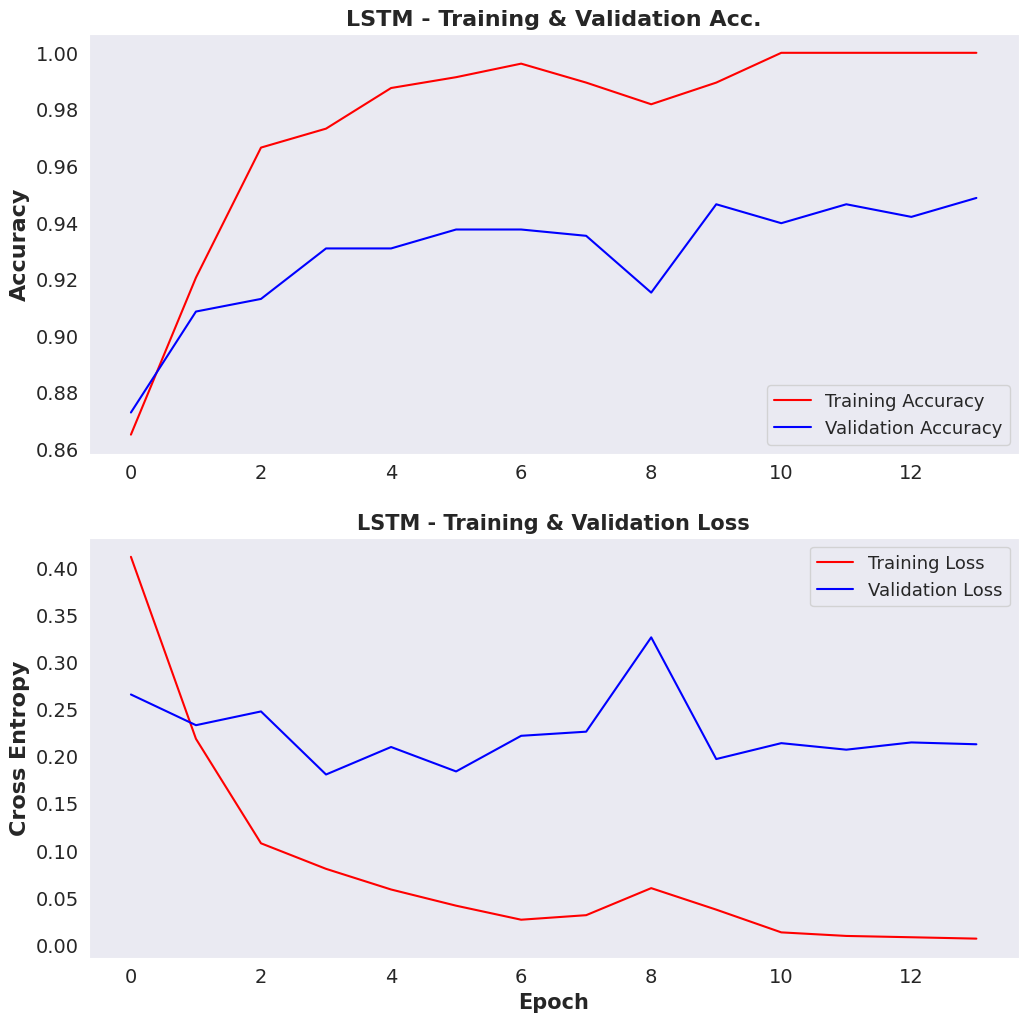

In [92]:
from tensorflow.keras.layers import Dense, Flatten, LSTM, Input, Dropout, BatchNormalization, GRU
acc = lstm_h.history['accuracy']
val_acc = lstm_h.history['val_accuracy']

loss = lstm_h.history['loss']
val_loss = lstm_h.history['val_loss']


plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('LSTM - Training & Validation Acc.', fontsize=16, weight='bold')


plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('LSTM - Training & Validation Loss', fontsize=15, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')

plt.show()

In [93]:
lstm_best = load_model('./best_lstm_model.h5')
lstm_acc = lstm_best.evaluate(X_test, y_test, verbose=0)[1]
print("Test Acc.: {:.3f}%".format(lstm_acc * 100))

Test Acc.: 91.875%


In [94]:
y_pred = np.array(list(map(lambda x: np.argmax(x), lstm_best.predict(X_test))))
y_test = y_test.idxmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

20/20 [==============================] - 2s 81ms/step
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       231
           1       0.94      0.81      0.87       219
           2       0.83      0.97      0.90       190

    accuracy                           0.92       640
   macro avg       0.92      0.92      0.92       640
weighted avg       0.92      0.92      0.92       640



Confusion Matrix:
 [[225   6   0]
 [  3 178  38]
 [  0   5 185]]


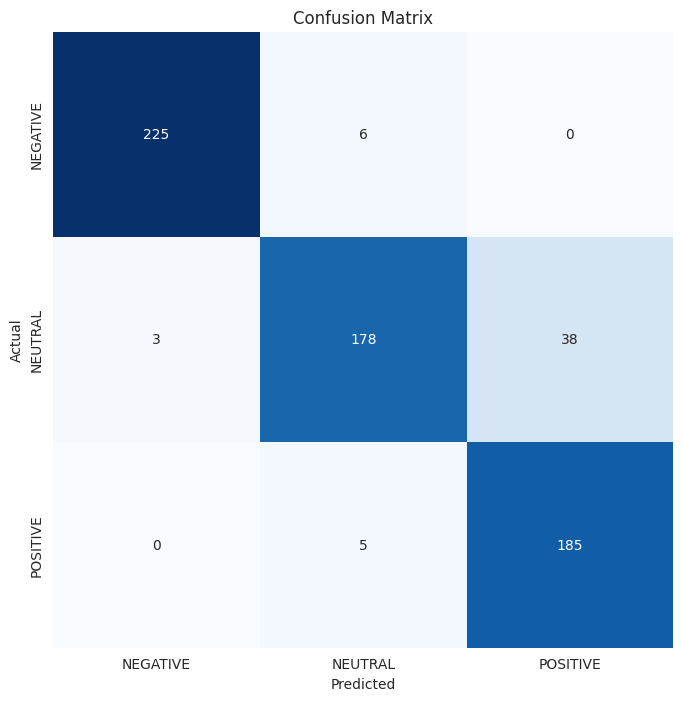

In [95]:
print("Confusion Matrix:\n",(cm))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

##GRU

In [96]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
expand_dims = tf.expand_dims(inputs, axis=2)
gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
flatten = tf.keras.layers.Flatten()(gru)
outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [97]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
print(model.summary())

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 2548)]            0         
                                                                 
 tf.expand_dims_1 (TFOpLamb  (None, 2548, 1)           0         
 da)                                                             
                                                                 
 gru_2 (GRU)                 (None, 2548, 256)         198912    
                                                                 
 flatten_4 (Flatten)         (None, 652288)            0         
                                                                 
 dense_10 (Dense)            (None, 3)                 1956867   
                                                                 
Total params: 2155779 (8.22 MB)
Trainable params: 2155779 (8.22 MB)
Non-trainable params: 0 (0.00 Byte)
_____________________

In [98]:
from tensorflow.keras.layers import Dense, Flatten, LSTM, Input, Dropout, BatchNormalization, GRU
i_gru = Input(shape=(X_train.shape[1], 1))

x_gru = GRU(256, return_sequences=True)(i_gru)
x_gru = Flatten()(x_gru)
y_gru = Dense(3, activation='softmax')(x_gru)

model_gru = Model(i_gru, y_gru)

model_gru.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 2548, 1)]         0         
                                                                 
 gru_3 (GRU)                 (None, 2548, 256)         198912    
                                                                 
 flatten_5 (Flatten)         (None, 652288)            0         
                                                                 
 dense_11 (Dense)            (None, 3)                 1956867   
                                                                 
Total params: 2155779 (8.22 MB)
Trainable params: 2155779 (8.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [99]:
adam = Adam(learning_rate=0.001)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
mc = ModelCheckpoint('./best_gru_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
lr_schedule = LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))

model_gru.compile(optimizer=adam,
                  loss=['categorical_crossentropy'],
                  metrics=['accuracy'])

gru_h = model_gru.fit(X_train, y_train,
                   batch_size=32,
                   validation_data=(X_val, y_val),
                   epochs=50,
                   callbacks=[es, mc, lr_schedule])




Epoch 1/50
33/33 [==============================] - ETA: 0s - loss: 0.8046 - accuracy: 0.8487
Epoch 1: val_accuracy improved from -inf to 0.78795, saving model to ./best_gru_model.h5
33/33 [==============================] - 13s 254ms/step - loss: 0.8046 - accuracy: 0.8487 - val_loss: 0.7377 - val_accuracy: 0.7879 - lr: 0.0010
Epoch 2/50
33/33 [==============================] - ETA: 0s - loss: 0.2765 - accuracy: 0.9157
Epoch 2: val_accuracy improved from 0.78795 to 0.90848, saving model to ./best_gru_model.h5
33/33 [==============================] - 4s 131ms/step - loss: 0.2765 - accuracy: 0.9157 - val_loss: 0.3361 - val_accuracy: 0.9085 - lr: 9.0484e-04
Epoch 3/50
33/33 [==============================] - ETA: 0s - loss: 0.1287 - accuracy: 0.9579
Epoch 3: val_accuracy improved from 0.90848 to 0.91741, saving model to ./best_gru_model.h5
33/33 [==============================] - 4s 122ms/step - loss: 0.1287 - accuracy: 0.9579 - val_loss: 0.2034 - val_accuracy: 0.9174 - lr: 8.1873e-04
Epoc

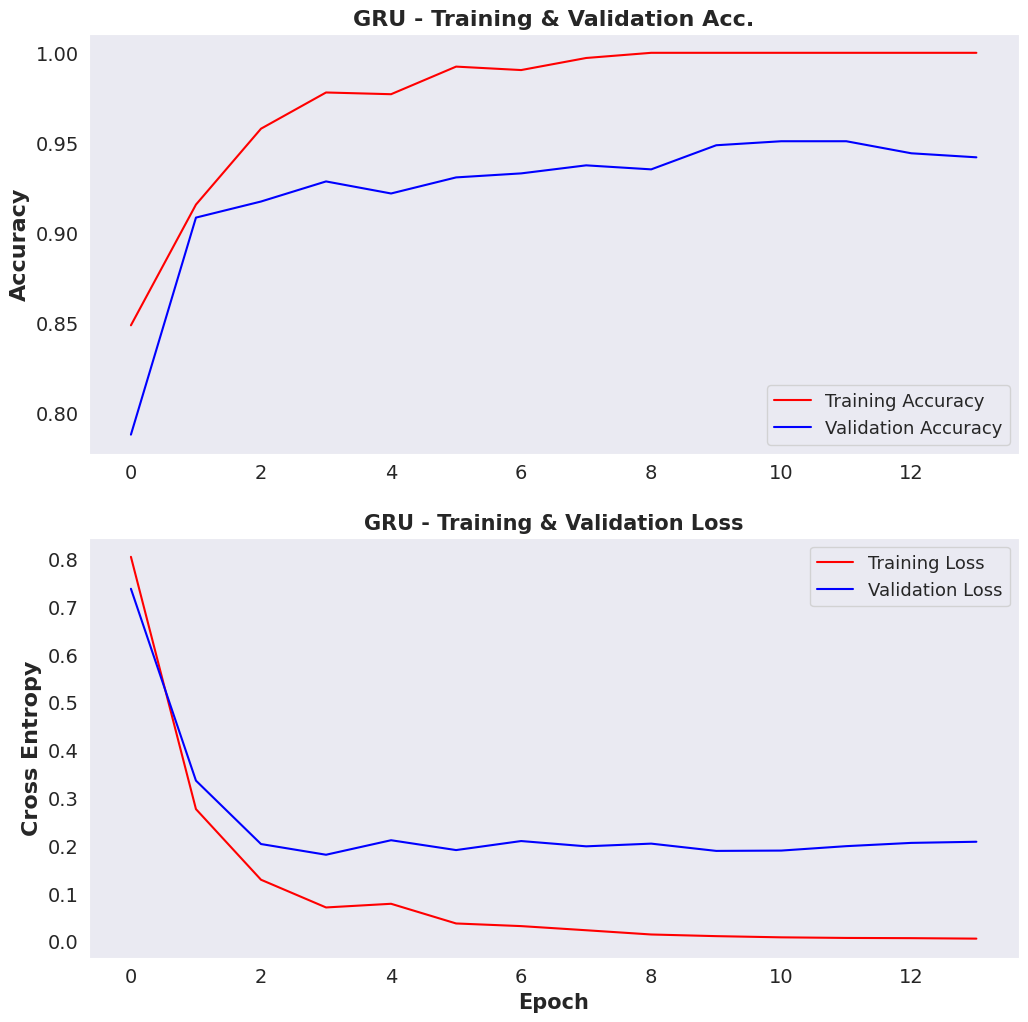

In [100]:
acc = gru_h.history['accuracy']
val_acc = gru_h.history['val_accuracy']

loss = gru_h.history['loss']
val_loss = gru_h.history['val_loss']


plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('GRU - Training & Validation Acc.', fontsize=16, weight='bold')


plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('GRU - Training & Validation Loss', fontsize=15, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')

plt.show()



Classification Report

Viewing classification report.

#DNN

In [117]:
i_dnn = Input(shape=(2548, ))

x_dnn = Dense(2548, activation='relu')(i_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.25)(x_dnn)

x_dnn = Dense(3822, activation='relu')(x_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.27)(x_dnn)

x_dnn = Dense(5096, activation='relu')(x_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.3)(x_dnn)

x_dnn = Dense(3822, activation='relu')(x_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.27)(x_dnn)

x_dnn = Dense(2548, activation='relu')(x_dnn)
x_dnn = BatchNormalization()(x_dnn)
x_dnn = Dropout(0.25)(x_dnn)

y_dnn = Dense(3, activation='softmax')(x_dnn)

dnn_model = Model(i_dnn, y_dnn)


dnn_model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 2548)]            0         
                                                                 
 dense_30 (Dense)            (None, 2548)              6494852   
                                                                 
 batch_normalization_20 (Ba  (None, 2548)              10192     
 tchNormalization)                                               
                                                                 
 dropout_20 (Dropout)        (None, 2548)              0         
                                                                 
 dense_31 (Dense)            (None, 3822)              9742278   
                                                                 
 batch_normalization_21 (Ba  (None, 3822)              15288     
 tchNormalization)                                        

In [118]:
adam = Adam(learning_rate=0.001)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
mc = ModelCheckpoint('./best_dnn_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
lr_schedule = LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))

dnn_model.compile(optimizer=adam,
                  loss=['categorical_crossentropy'],
                  metrics=['accuracy'])

dnn_h = dnn_model.fit(X_train, y_train,
                   batch_size=32,
                   validation_data=(X_val, y_val),
                   epochs=50,
                   callbacks=[es, mc, lr_schedule])



Epoch 1/50
31/33 [===========================>..] - ETA: 0s - loss: 1.5124 - accuracy: 0.8327
Epoch 1: val_accuracy improved from -inf to 0.33929, saving model to ./best_dnn_model.h5
33/33 [==============================] - 10s 193ms/step - loss: 1.4912 - accuracy: 0.8333 - val_loss: 302.9257 - val_accuracy: 0.3393 - lr: 0.0010
Epoch 2/50
32/33 [============================>.] - ETA: 0s - loss: 0.4505 - accuracy: 0.8799
Epoch 2: val_accuracy improved from 0.33929 to 0.58929, saving model to ./best_dnn_model.h5
33/33 [==============================] - 13s 403ms/step - loss: 0.4483 - accuracy: 0.8793 - val_loss: 41.9722 - val_accuracy: 0.5893 - lr: 9.0484e-04
Epoch 3/50
32/33 [============================>.] - ETA: 0s - loss: 0.2637 - accuracy: 0.9160
Epoch 3: val_accuracy did not improve from 0.58929
33/33 [==============================] - 2s 47ms/step - loss: 0.2594 - accuracy: 0.9176 - val_loss: 16.0467 - val_accuracy: 0.5871 - lr: 8.1873e-04
Epoch 4/50
32/33 [=======================

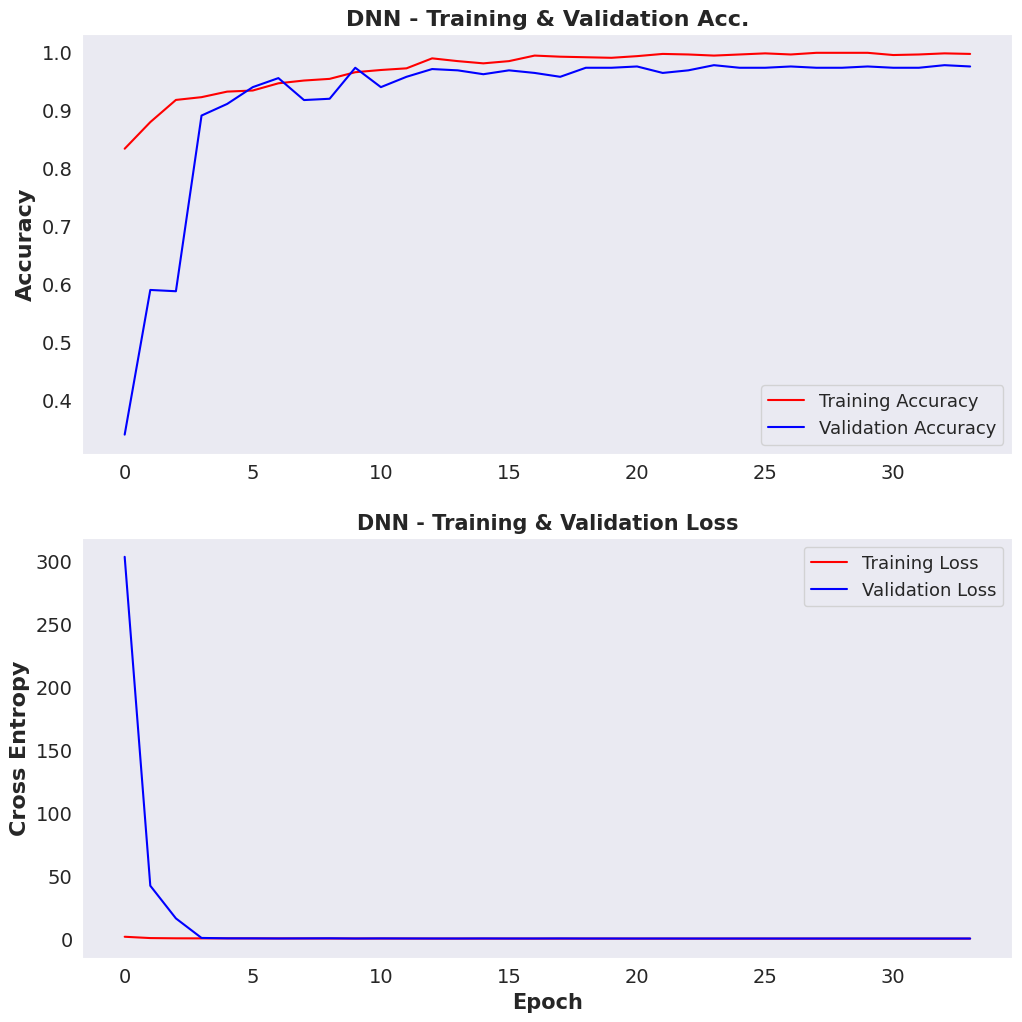

In [119]:
# Show History
acc = dnn_h.history['accuracy']
val_acc = dnn_h.history['val_accuracy']

loss = dnn_h.history['loss']
val_loss = dnn_h.history['val_loss']


plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy', color='r')
plt.plot(val_acc, label='Validation Accuracy', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower right', fontsize=13)
plt.ylabel('Accuracy', fontsize=16, weight='bold')
plt.title('DNN - Training & Validation Acc.', fontsize=16, weight='bold')



plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss', color='r')
plt.plot(val_loss, label='Validation Loss', color='b')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=13)
plt.ylabel('Cross Entropy', fontsize=16, weight='bold')
plt.title('DNN - Training & Validation Loss', fontsize=15, weight='bold')
plt.xlabel('Epoch', fontsize=15, weight='bold')

plt.show()


In [126]:
dnn_best = load_model('./best_dnn_model.h5')
dnn_acc = dnn_best.evaluate(X_test, y_test, verbose=0)[1]
print("Test Acc. DNN: {:.3f}%".format(dnn_acc * 100))

Test Acc. DNN: 98.125%


In [127]:
y_pred = np.array(list(map(lambda x: np.argmax(x), dnn_best.predict(X_test))))
y_test = y_test.idxmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

20/20 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       231
           1       0.98      0.97      0.97       219
           2       0.98      0.99      0.98       190

    accuracy                           0.98       640
   macro avg       0.98      0.98      0.98       640
weighted avg       0.98      0.98      0.98       640



#PCA

In [112]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data_encoded)
pca = PCA(n_components = 20)
pca_vectors = pca.fit_transform(scaled_df)
for index, var in enumerate(pca.explained_variance_ratio_):
    print("Explained Variance ratio by Principal Component ", (index+1), " : ", var)

Explained Variance ratio by Principal Component  1  :  0.3677554615715403
Explained Variance ratio by Principal Component  2  :  0.09551015343678974
Explained Variance ratio by Principal Component  3  :  0.08432762783222364
Explained Variance ratio by Principal Component  4  :  0.06083579623458212
Explained Variance ratio by Principal Component  5  :  0.04743577056301185
Explained Variance ratio by Principal Component  6  :  0.03081116421617108
Explained Variance ratio by Principal Component  7  :  0.024712978695577186
Explained Variance ratio by Principal Component  8  :  0.013856043612053502
Explained Variance ratio by Principal Component  9  :  0.012404686087784209
Explained Variance ratio by Principal Component  10  :  0.012106422763121431
Explained Variance ratio by Principal Component  11  :  0.00956010947054483
Explained Variance ratio by Principal Component  12  :  0.009160853070615751
Explained Variance ratio by Principal Component  13  :  0.00873924468137895
Explained Varianc

In [113]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data_encoded)
pca = PCA(n_components = 20)
pca_vectors = pca.fit_transform(scaled_df)
for index, var in enumerate(pca.explained_variance_ratio_):
    print("Explained Variance ratio by Principal Component ", (index+1), " : ", var)

Explained Variance ratio by Principal Component  1  :  0.3677554615715402
Explained Variance ratio by Principal Component  2  :  0.09551015343678995
Explained Variance ratio by Principal Component  3  :  0.08432762783222372
Explained Variance ratio by Principal Component  4  :  0.060835796234582164
Explained Variance ratio by Principal Component  5  :  0.047435770563011764
Explained Variance ratio by Principal Component  6  :  0.030811164216171052
Explained Variance ratio by Principal Component  7  :  0.024712978695577682
Explained Variance ratio by Principal Component  8  :  0.013856043613565308
Explained Variance ratio by Principal Component  9  :  0.012404686088442914
Explained Variance ratio by Principal Component  10  :  0.012106422772187405
Explained Variance ratio by Principal Component  11  :  0.009560109492349684
Explained Variance ratio by Principal Component  12  :  0.009160853354131537
Explained Variance ratio by Principal Component  13  :  0.008739244735533596
Explained Va

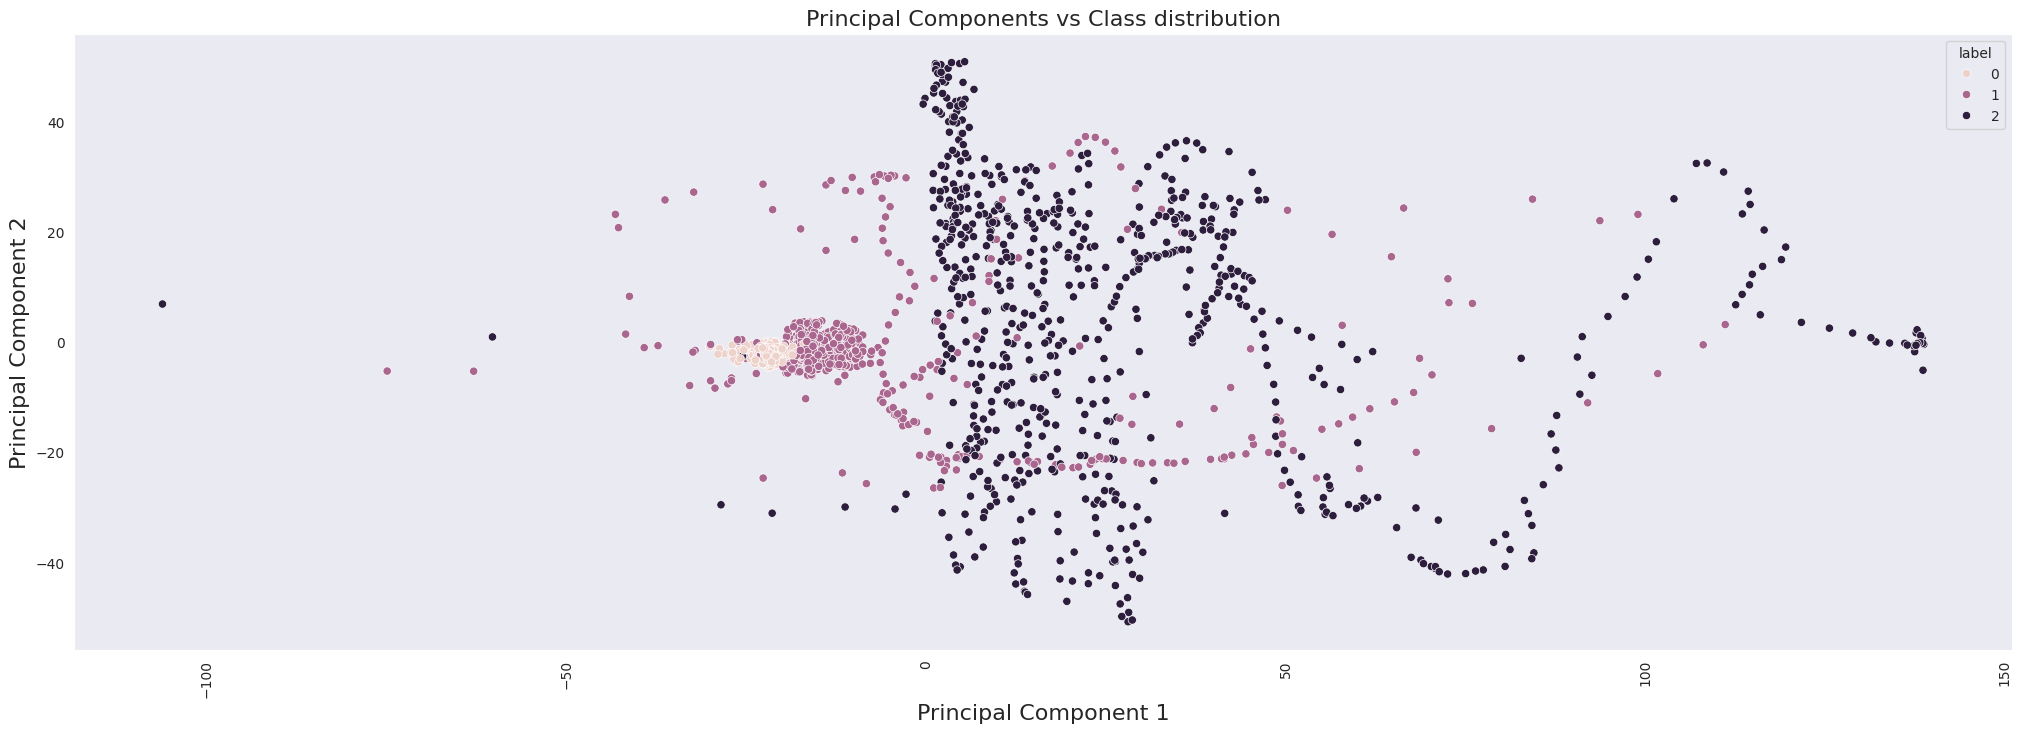

In [114]:
label_df = data_encoded['label']
plt.figure(figsize=(25,8))
sns.scatterplot(x=pca_vectors[:, 0], y=pca_vectors[:, 1], hue=label_df)
plt.title('Principal Components vs Class distribution', fontsize=16)
plt.ylabel('Principal Component 2', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=16)
plt.xticks(rotation='vertical');

In [115]:

pl_mlp = Pipeline(steps=[('scaler',StandardScaler()),
                             ('mlp_ann', MLPClassifier(hidden_layer_sizes=(1275, 637)))])
scores = cross_val_score(pl_mlp, data_encoded, label_df, cv=2,scoring='accuracy')
print('Accuracy for ANN : ', scores.mean())

Accuracy for ANN :  0.9662288930581613
